# Day 19:30 daily statistics - Residuos P1

$\color{red}{\text{Exercício 1}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Uma faculdade de economia fez uma pesquisa para estudar a evolução do salário médio inicial mensal dos seus ex-alunos, formados durante o período de 1987 a 1993. Para tanto selecionou-se 20 formandos de cada ano, para os quais foram calculadas as médias salariais para cada ano. Os dados encontram-se a seguir

| Ano | Média Salarial |
|:---:|:--------------:|
|  87 |     1092,31    |
|  88 |     1203,46    |
|  89 |     1265,54    |
|  90 |     1298,77    |
|  91 |     1396,85    |
|  92 |     1588,46    |
|  93 |     1683,85    |

+ a) Calcule os resíduos padronizados do modelo ajustado;
+ b) Faça os gráficos dos resíduos para verificar possíveis violações das suposições do MRLS.

$\color{red}{\text{a)}}$ **O cálculo dos resíduos padronizados do modelo ajustado são apresentados a seguir**

In [1]:
#Entrando com os dados
ano=seq(87,93,by=1)
sal=c(1092.31, 1203.46, 1265.54, 1298.77, 1396.85, 1588.46, 1683.85)
base1=data.frame(ano,sal)
ajuste1=lm(sal~ano,data=base1)
summary(ajuste1)


Call:
lm(formula = sal ~ ano, data = base1)

Residuals:
       1        2        3        4        5        6        7 
 17.6968  33.2779  -0.2111 -62.5500 -60.0389  36.0021  35.8232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7239.88     816.51  -8.867 0.000303 ***
ano            95.57       9.07  10.537 0.000133 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.99 on 5 degrees of freedom
Multiple R-squared:  0.9569,	Adjusted R-squared:  0.9483 
F-statistic:   111 on 1 and 5 DF,  p-value: 0.000133


In [2]:
#Calculo dos resíduos padronizados
dp=47.99
residuos=residuals(ajuste1)
residuos_padronizados=residuos/dp
data.frame(residuos_padronizados)

residuos_padronizados
0.368759861
0.693433156
-0.004398238
-1.303396541
-1.251071652
0.750200935
0.746472479


$\color{red}{\text{b)}}$ **Faça os gráficos dos resíduos para verificar possíveis violações das suposições do MRLS**:

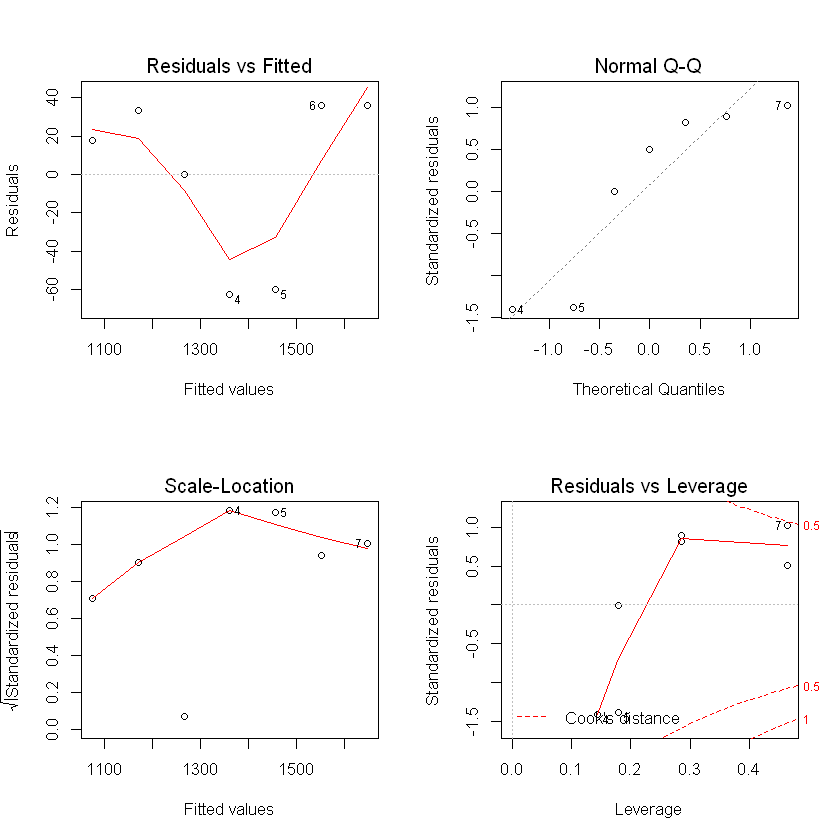

In [3]:
#Plotando os resíduos padronizados
par(mfrow=c(2,2))
plot(ajuste1)

In [4]:
#Teste de homocedasticidade da variância dos resíduos pelo teste de BP
require(lmtest)
bptest(ajuste1)

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  ajuste1
BP = 0.84814, df = 1, p-value = 0.3571


Levando em consideração a seguinte hipótese:

$$H_0: \sigma_1^2=\sigma_2^2$$
$$H_1: \sigma_1^2\neq \sigma_2^2$$

Com um p-valor de 0,3571, não é possível rejeitarmos a hipótese nula, ou seja existem fortes evideências ao nível de 5% de significância que nos garantem que existem igualdades entre as variâncias dos resíduos. 



$\color{red}{\text{Exemplo 6.4}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Um pesquisador estuda os efeitos de um produto químico no crescimento de girassóis. Em um laboratório são preparados vasos onde são plantadas sementes de girassóis. Em certa data todas as plantas são regadas com uma solução contendo o prodto químico e após alguns dias as plantas são cortadas e pesadas. A tabela abaixo apresenta os valores do logaritmo da dosagem do produto químico aplicada, X ($\log(g/cm^2)$) e o peso da planta, denominado peso verde, Y (g)

| Peso Verde |  dose |
|:----------:|:-----:|
|   5,7925   | -4,24 |
|   5,5675   | -4,24 |
|   5,6800   | -4,24 |
|   4,8925   | -4,24 |
|   5,6725   | -5,24 |
|   7,7775   | -5,24 |
|   6,8800   | -5,24 |
|   5,5975   | -5,24 |
|   7,1500   | -6,24 |
|   7,5850   | -6,24 |
|   6,9167   | -6,24 |
|   6,3975   | -6,24 |
|   8,0350   | -7,24 |
|   8,4875   | -7,24 |
|   6,2825   | -7,24 |
|   11,1825  | -7,24 |
|   11,2000  | -8,24 |
|   6,3750   | -8,24 |
|   9,9900   | -8,24 |
|   8,5150   | -8,24 |

+ a) Determine o modelo;
+ b) Mostre o gráfico de dispersão entre peso verde e dose e o gráfico de resíduos versus dose;
+ c) Apresente o gráfico de previsão com os novos valores ajustados para log(peso);
+ d) Use o estimador de Miller para as estimativas dos valores esperados do peso verda na escala original;

$\color{red}{\text{a)}}$ **O ajuste do modelo é apresentado abaixo**:

In [5]:
#Entrando com os dados
peso=c(5.7925, 5.5675, 5.6800, 4.8925, 5.6725, 7.7775,   
       6.8800, 5.5975, 7.1500, 7.5850, 6.9167, 6.3975, 8.0350, 8.4875,   
       6.2825, 11.1825, 11.2000, 6.3750, 9.9900, 8.5150) 

dose=c(-4.24, -4.24, -4.24, -4.24, -5.24, -5.24, -5.24, -5.24, -6.24, -6.24, 
       -6.24, -6.24, -7.24, -7.24, -7.24, -7.24, -8.24, -8.24, -8.24, -8.24)

dados6=data.frame(peso,dose)
ajuste6=lm(peso~dose,data=dados6)
summary(ajuste6)


Call:
lm(formula = peso ~ dose, data = dados6)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.74159 -0.63055 -0.03121  0.35607  2.97479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6275     1.3170   1.236 0.232451    
dose         -0.9089     0.2058  -4.415 0.000334 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.302 on 18 degrees of freedom
Multiple R-squared:  0.5199,	Adjusted R-squared:  0.4933 
F-statistic:  19.5 on 1 and 18 DF,  p-value: 0.0003339


O modelo estimado é dado por $\hat{y}=1,6275-0,9089X$

$\color{red}{\text{b)}}$ **Os gráficos de dispersão e de residuos versus dose** são apresentados abaixo:

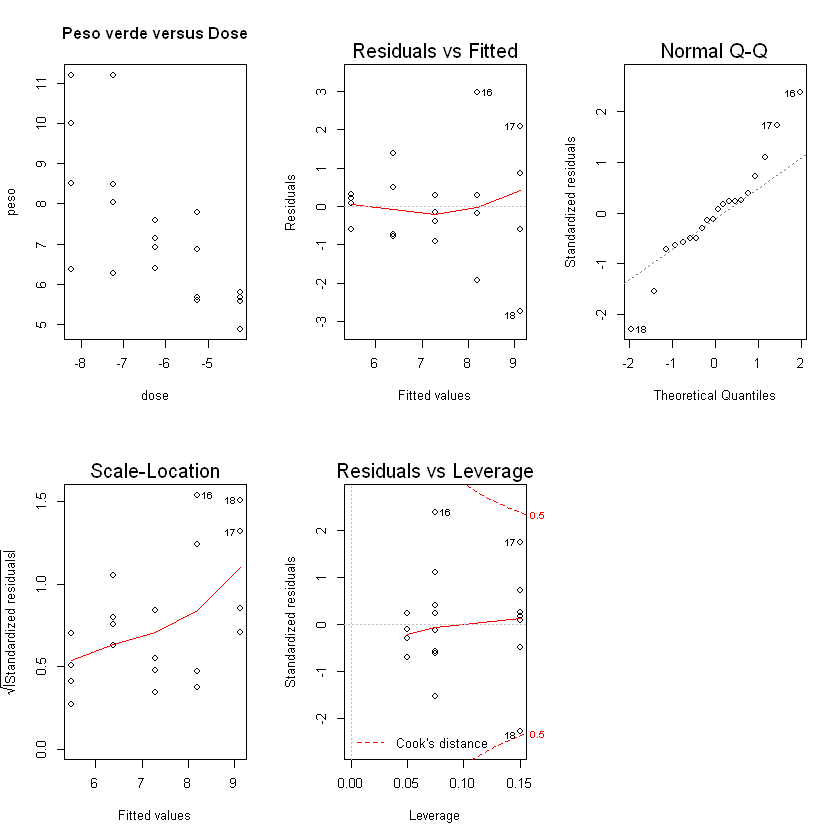

In [6]:
 #Gráfico de dispersão 
par(mfrow=c(2,3))
plot(dose,peso,main="Peso verde versus Dose")
plot(ajuste6)

O gráfico **Residuals vs Fitted** apresenta um decréscimo na variância dos resíduso à medida que a dosagem aumenta. O gráfico **Normal Q-Q** não apresenta violação da suposição de normalidade. Para melhorar o ajuste nos resíduos, optou-se por realizar a seguinte transformação: $log(y)$. Essa transformação estabiliza a variância quando esta tende a crescer à medida que Y também cresce. Em algumas situações pode também ajudar a normalizar os dados. 

In [7]:
#Transformação logaritmo do peso

#Entrando com os dados transformados pelo log(x) = ln(x) 
peso2=log(c(5.7925, 5.5675, 5.6800, 4.8925, 5.6725, 7.7775,   
       6.8800, 5.5975, 7.1500, 7.5850, 6.9167, 6.3975, 8.0350, 8.4875,   
       6.2825, 11.1825, 11.2000, 6.3750, 9.9900, 8.5150)) 

dose2=c(-4.24, -4.24, -4.24, -4.24, -5.24, -5.24, -5.24, -5.24, -6.24, -6.24, 
       -6.24, -6.24, -7.24, -7.24, -7.24, -7.24, -8.24, -8.24, -8.24, -8.24)

dados7=data.frame(peso2,dose2)
ajuste7=lm(peso2~dose2,data=dados7)
summary(ajuste7)

cat("\n\n\nAnova para a variável transformada \n\n")
anova(ajuste7)



Call:
lm(formula = peso2 ~ dose2, data = dados7)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35107 -0.10337  0.00440  0.07192  0.33249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.20151    0.16300   7.371  7.7e-07 ***
dose2       -0.12160    0.02548  -4.773 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1611 on 18 degrees of freedom
Multiple R-squared:  0.5586,	Adjusted R-squared:  0.5341 
F-statistic: 22.78 on 1 and 18 DF,  p-value: 0.0001521





Anova para a variável transformada 



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
dose2,1,0.5914162,0.59141619,22.78257,0.000152071
Residuals,18,0.4672647,0.02595915,NA,NA


Observando a **anova** é possível concluir que o modelo ajustado é significativo. O valor estimado de $\sigma^2=0,02595$, é próximo de zero, o que favorece o uso desta transformação.

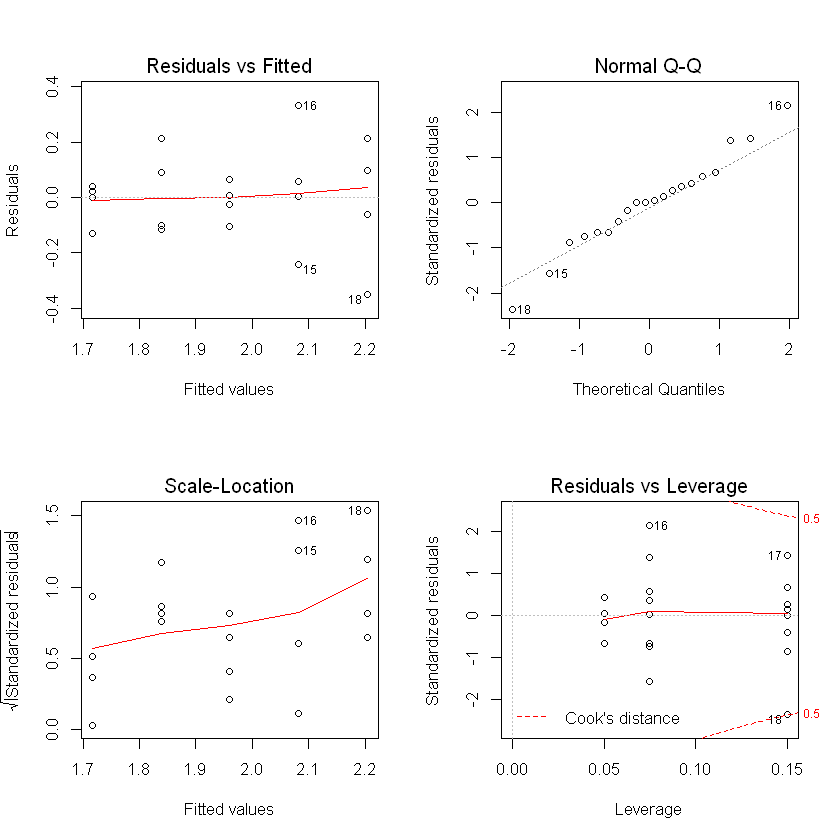

In [8]:
#Gráfico da variável ajustada
par(mfrow=c(2,2))
plot(ajuste7)

O gráfico dos **resíduos vs valores ajustados** não mostra mais o acentuado declínio da variância com o aumento da dosagem e o gráfico de probabilidade normal dos resíduos não apresenta evidência contra a suposição de normalidade do erro.

$\color{red}{\text{c)}}$ **Reta estimada ajustada pela transformação**:

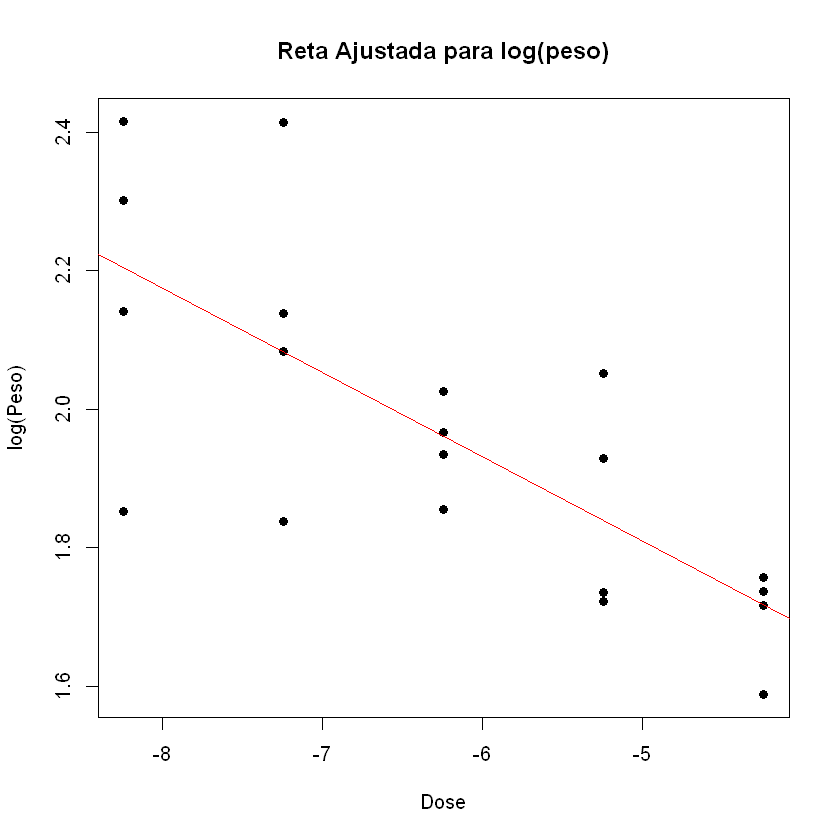

In [9]:
plot(peso2~dose2,pch=16,data=dados7,main="Reta Ajustada para log(peso)",ylab="log(Peso)",xlab="Dose")
abline(ajuste7,col="red")

O modelo ajustado é dado por $log(\hat{y})=1,2-0,1216X$

$\color{red}{\text{d)}}$ **Estimador de Miller para a escala original dos dados**:

In [10]:
# Resultados obtidos
preditos=predict(ajuste7)
residuos=residuals(ajuste7)
final=data.frame(dose2,preditos,residuos)
final

dose2,preditos,residuos
-4.24,1.717076,0.0394879409
-4.24,1.717076,-0.0001299163
-4.24,1.717076,0.0198751963
-4.24,1.717076,-0.1293726162
-5.24,1.838671,-0.1030413483
-5.24,1.838671,0.2125636638
-5.24,1.838671,0.0899473660
-5.24,1.838671,-0.1163512165
-6.24,1.960267,0.0068458212
-6.24,1.960267,0.0659060773


Então, usando o estimador de Miller, as estimativas dos valores esperados do peso verde, na escala original são dadas por:

$$\exp(\hat{\beta}_0+\hat{\beta}_1X)\exp(\frac{\hat{\sigma}^2}{2})$$

sendo $\hat{\beta}_0$, $\hat{\beta}_1$ e $\hat{\sigma}^2$ do ajuste do modelo na escala transformada. 

Logo, as estimativas para os valores de X = $(-4,24 \qquad -5,24 \qquad -6,24 \qquad -7,24\qquad -8,24)$ $\qquad$são respectivamente:

In [11]:
#Transformação de Miller
# exp(beta0+beta1*x)*exp(sigma2/2)

beta0=1.20151 
beta1=-0.12160 
sigma2=0.02595915 

#Valores de x
x=c(-4.24, -5.24, -6.24, -7.24, -8.24)

#Estimativas
peso_est=exp(beta0+beta1*x)*exp(sigma2/2)

#Estimativas de Miller para peso na escala original
resul=data.frame(x,peso,peso_est); resul



x,peso,peso_est
-4.24,5.7925,5.641069
-5.24,5.5675,6.370472
-6.24,5.6800,7.194189
-7.24,4.8925,8.124414
-8.24,5.6725,9.174919
-4.24,7.7775,5.641069
-5.24,6.8800,6.370472
-6.24,5.5975,7.194189
-7.24,7.1500,8.124414
-8.24,7.5850,9.174919


$\color{red}{\text{Exercício 3}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** A faculdade de economia que fez o levantamento dos salários dos seus formandos resolveu refazer a pesquisa, só que desta vez selecionnando apenas 5 formandos de cada um dos anos considerados. Faça a análise completa dos resíduos, tentando identificar possíveis violações das suposições do modelo. Caso seja identificado alguma violação, proponha a solução. Os dados registrados foram os seguintes:

| Anos | Salarios | Salarios | Salarios | Salarios | Salarios |
|:----:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  87  |  1056,42 |  1131,62 |  1063,25 |  1082,89 |  1047,18 |
|  88  |  1202,32 |  1160,46 |  1336,04 |  1090,78 |  1118,94 |
|  89  |  1232,46 |  1346,49 |  1141,38 |  1266,01 |  1334,23 |
|  90  |  1302,18 |  1432,95 |  1395,09 |  1350,77 |  1332,83 |
|  91  |  1455,37 |  1492,35 |  1529,65 |  1397,54 |  1235,04 |
|  92  |  1530,37 |  1670,41 |  1685,58 |  1605,43 |  1641,18 |
|  93  |  1638,24 |  1483,88 |  1653,36 |  1803,77 |  1628,48 |

In [12]:
#Entrando com os dados
anos=rep(seq(87,93,by=1),each=5)
salarios=c(1056.42,   1131.62,   1063.25,   1082.89,   1047.18, 
           1202.32,   1160.46,   1336.04,   1090.78,   1118.94, 
           1232.46,   1346.49,   1141.38,   1266.01,   1334.23, 
           1302.18,   1432.95,   1395.09,   1350.77,   1332.83, 
           1455.37,   1492.35,   1529.65,   1397.54,   1235.04, 
           1530.37,   1670.41,   1685.58,   1605.43,   1641.18, 
           1638.24,   1483.88,   1653.36,   1803.77,   1628.48)
dados3=data.frame(anos,salarios)

#Ajustando o modelo
ajuste3=lm(salarios~anos,data=dados3)
summary(ajuste3)


Call:
lm(formula = salarios ~ anos, data = dados3)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.80  -34.24  -10.47   60.76  164.15 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7450.441    638.017  -11.68 2.91e-13 ***
anos           97.981      7.087   13.82 2.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 83.86 on 33 degrees of freedom
Multiple R-squared:  0.8528,	Adjusted R-squared:  0.8483 
F-statistic: 191.1 on 1 and 33 DF,  p-value: 2.781e-15


O modelo estimado é dado por $\hat{y}=-7450,44+97,98X$, sendo considerado significativo para fins de inferência. Dizemos que o número de anos explica em 85,28% do valor do número de salários, sendo considerado um bom modelo. A análise dos resíduos é apresentado a seguir:

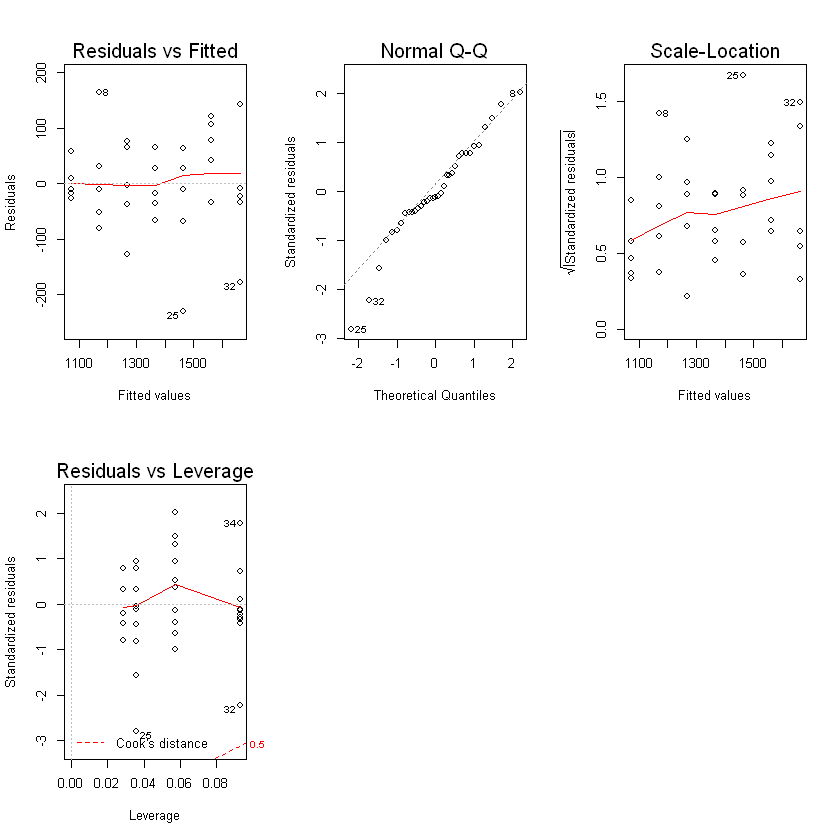

In [13]:
par(mfrow=c(2,3))
plot(ajuste3)

Os gráficos acima não apresentam quebra dos pressupostos dos resíduos. É interessante apresentar os resultados em termos de testes estatísticos, o que será apresentado abaixo:

In [14]:
require(lmtest)
require(zoo)
bptest(ajuste3)


	studentized Breusch-Pagan test

data:  ajuste3
BP = 1.8287, df = 1, p-value = 0.1763


Tem termos práticos estamos testando a presença de variância constante nos resíduos através do teste de Breusch-Pagan, onde a hipótese é definida da seguinte forma:

$$H_0: Homocedastico$$
$$H_1: Heterocedastico$$

Portanto, visto que o p-valor associado ao teste é de 0,1763, não possuímos evidências amostrais suficiente para rejeitarmos a hipótese nula, ou seja, os resíduos podem ser considerados constantes, caracterizando a presença da homocedasticidade nos resíduos (variância dos resíduos constantes). O teste de normalidade é apresentado a seguir:

In [15]:
#Teste de normalidade
shapiro.test(residuals(ajuste3))


	Shapiro-Wilk normality test

data:  residuals(ajuste3)
W = 0.96407, p-value = 0.3017


O teste de normalidade dos resíduos foi apresentado pelo teste Shapiro-Wilk. A formulação da hipótese de teste é dada por:

$$H_0: \text{Distribuição Normal}$$
$$H_1: \text{Outra distribuição}$$

Portanto, o p-valor associado ao teste é de 0,3017 caracterizando a não rejeição da hipótese nula, ou seja os resíduos apresentam-se normalmente distribuidos, logo o modelo apresentado não mostrou quebra das suposições nos resíduos através da análise gráfica e dos testes estatísticos associados. 

$\color{red}{\text{Exercício 4}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Uma agência de empregos faz anúncios uma vez por semana na seção de classificados de um determinado jornal. Desconfia-se que o número de respostas aos anúncios está relacionado com o número de linhas utilizadas no anúncio. Foram selecionados 14 anúncios e o número de respostas a cada um deles foi observado. Os dados foram os seguintes:

| Número de Linhas | Respostas | Respostas |
|:----------------:|:---------:|:---------:|
|         3        |     3     |     7     |
|         4        |     3     |           |
|         5        |     5     |           |
|         6        |     7     |           |
|         8        |     7     |     16    |
|        10        |     10    |     12    |
|        12        |     10    |     8     |
|        14        |     14    |     16    |
|        16        |     14    |           |

Faça a análise de resíduos para estes dados. Comente.


Call:
lm(formula = resp ~ linhas, data = dados4)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2725  -1.4814   0.2789   2.7480   9.1157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.4961     2.5617   0.584   0.5673  
linhas        0.6735     0.2642   2.549   0.0214 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.872 on 16 degrees of freedom
Multiple R-squared:  0.2888,	Adjusted R-squared:  0.2444 
F-statistic: 6.498 on 1 and 16 DF,  p-value: 0.02144


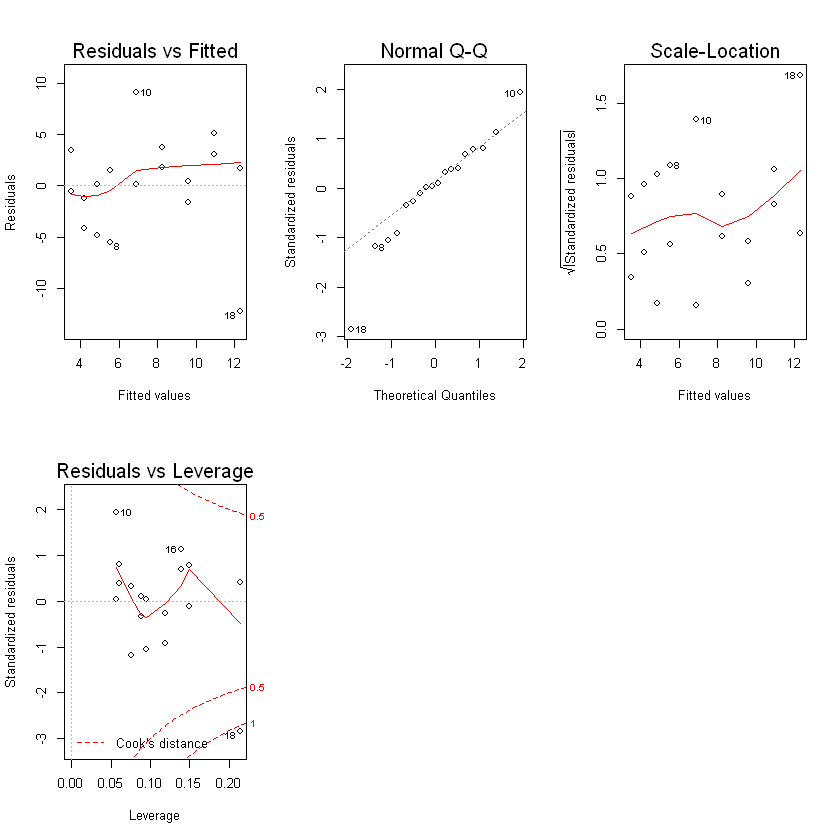

In [16]:
#Entrando com os dados
x1=seq(3,6,by=1)
x2=seq(8,16,by=2)
linhas=rep(c(x1,x2),each=2)
resp=c(3,7,3,0,5,0,7,0,7,16,10,12,10,8,14,16,14,0)

dados4=data.frame(linhas,resp)
ajuste4=lm(resp~linhas,data=dados4)

#Análise do modelo
summary(ajuste4)



#Gráfico dos resíduos
par(mfrow=c(2,3))
plot(ajuste4)



In [17]:
#Análise dos resíduos
bptest(ajuste4)                           #Teste para verificar a homocedasticidade 



	studentized Breusch-Pagan test

data:  ajuste4
BP = 1.9802, df = 1, p-value = 0.1594


O teste acima não detectou a presença de *heterocedasticidade* na variância dos resíduos, sendo considerados homocedásticos pela análise do p-valor.

In [18]:
shapiro.test(residuals(ajuste4))          #Teste de normalidade nos resíduos


	Shapiro-Wilk normality test

data:  residuals(ajuste4)
W = 0.95172, p-value = 0.4527


Os resíduos não apresentaram quebra da hipótese de normalidade e homocedasticidade, no entanto o coeficiente de determinação é muito baixo. Isso se deve ao fato de haver iterações em X, ou seja, existem repetições de valores de X gerando respostas diferente para a variável dependente (Y). Desta forma, será calculado o coeficiente de determinação *real*, usando a seguinte abordagem:

Para determinar o (erro puro) e a (falta de ajuste) dentro da tabela da ANOVA basta declarar a variável preditora como se fosse um ***factor***, como será visto no código abaixo.

In [19]:
erro_puro <- lm(resp~factor(linhas))
anova(ajuste4,erro_puro)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16,379.7618,NA,NA,NA,NA
9,194.0000,7,185.7618,1.231116,0.3768143


Dos resultados encontrados na tabela acima temos: Soma dos quadrados dos resíduos = 379,76, Soma dos Quadrados do Erro Puro = 194 e a Soma de Quadrados da Falta de Ajuste = 185,76, com 16, 9 e 7 graus de liberdade respectivamente. 

Portanto o coeficiente de determinação Real será a razão entre o coeficiente de determinação encontrado no primeiro modelo (R^2 =  0.2888) e o coeficiente de determinação máximo, que será obtido no ajuste da categorização da variável idade, para isso temos: 

In [20]:
#determinação do coeficiente de determinação máximo para a categorização da variável resposta

erro_puro_s=summary(erro_puro)
cat("O coeficiente de determinação máximo é dado por",erro_puro_s$r.squared,"\n")

O coeficiente de determinação máximo é dado por 0.6367041 


Portanto o coeficiente de determinação real é dado por: $R^2_{real}=R^2/R^2_{max}=\frac{0,2888}{0,6367041}=0,4535859$. Portanto 45,35% da variabilidade total dos dados podem ser explicado pelo modelo de regressão, esse valor da uma ideia melhor do que foi alcançado pelo modelo dentro do que era possível. O mesmo procedimento é apresentado abaixo feito no R:

In [21]:
#Cálculo do R2 real
erro_1=summary(ajuste4)
erro_1_cal=erro_1$r.squared

#Calculo do R2 máximo
erro_2 <- lm(resp~factor(linhas))
erro_maximo=summary(erro_2)
erro_maximo_cal=erro_maximo$r.squared


#Erro Real
cat("O Coeficiente de determinação real é dado por",erro_1_cal/erro_maximo_cal,"\n\n")

O Coeficiente de determinação real é dado por 0.4536419 



$\color{red}{\text{Exercício 5}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Os dados abaixo são referentes ao lucro e ao gasto com publicidade de uma loja de eletônicos, em milhares de reais, para um período de 19 meses.

| Lucros | Gastos | Lucros | Gastos |
|:------:|:------:|:------:|:------:|
|   260  |   12   |   436  |   46   |
|   328  |   25   |   439  |   47   |
|   376  |   30   |   452  |   47   |
|   356  |   35   |   465  |   55   |
|   404  |   41   |   461  |   59   |
|   399  |   41   |   475  |   64   |
|   404  |   41   |   462  |   66   |
|   414  |   44   |   472  |   73   |
|   428  |   45   |   456  |   74   |
|   496  |   87   |        |        |

Verifique se as suposições do MRLS estão sendo satisfeitas.

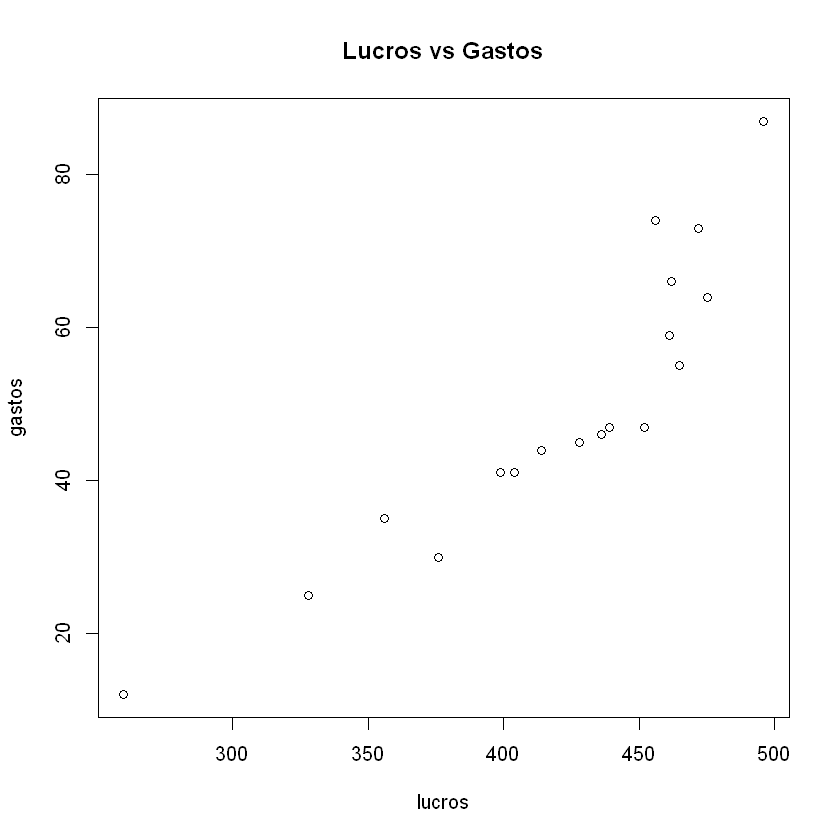

In [22]:
#Entrando com os dados
lucros=c(260,328,376,356,404,399,404,414,428,496,436,439,452,465,461,475,462,472,456)
gastos=c(12,25,30,35,41,41,41,44,45,87,46,47,47,55,59,64,66,73,74)
dados5=data.frame(lucros,gastos)

#Gráfico da relação entre X e Y
plot(lucros,gastos,main="Lucros vs Gastos")

In [23]:
#Ajuste do modelo de regressão aos dados
ajuste5=lm(gastos~lucros,data=dados5)
summary(ajuste5)


Call:
lm(formula = gastos ~ lucros, data = dados5)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.120  -6.382  -2.028   4.625  16.352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.5863    13.7768  -5.124 8.47e-05 ***
lucros        0.2848     0.0325   8.763 1.03e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.03 on 17 degrees of freedom
Multiple R-squared:  0.8187,	Adjusted R-squared:  0.8081 
F-statistic: 76.79 on 1 and 17 DF,  p-value: 1.034e-07


O modelo estimado para o problema apresentado é dado por $\hat{y}=-70,58+0,2848X$ com um coeficiente de determinação de 81,87%. Uma análise dos resíduos é apresentado a seguir.

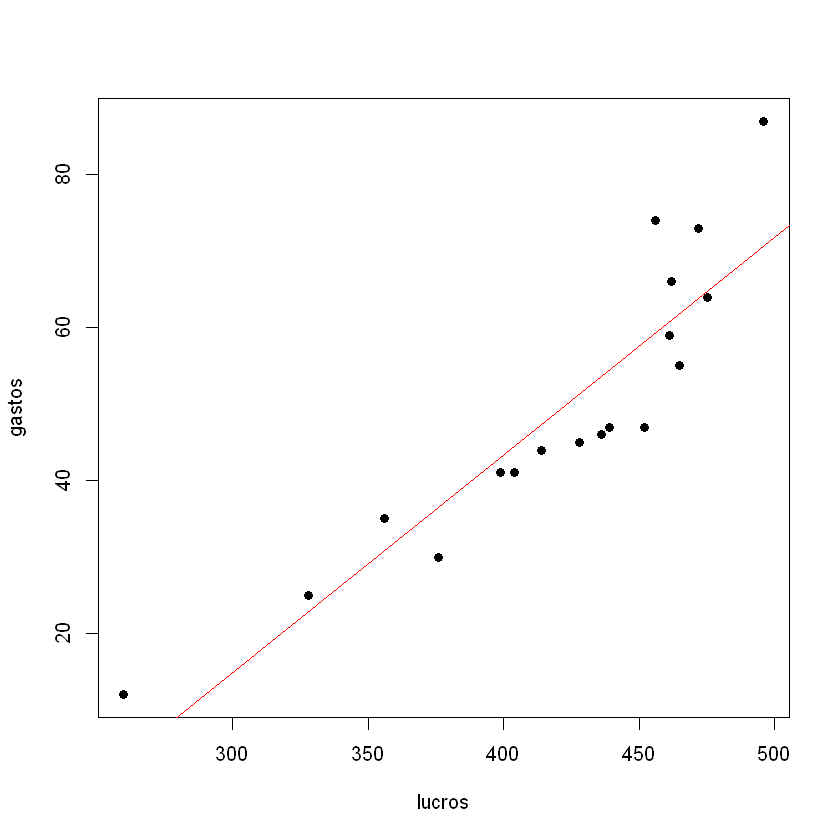

In [24]:
#Plotando o modelo estimado aos dados
plot(gastos~lucros,pch=16,data=dados5)
abline(ajuste5,col="red")

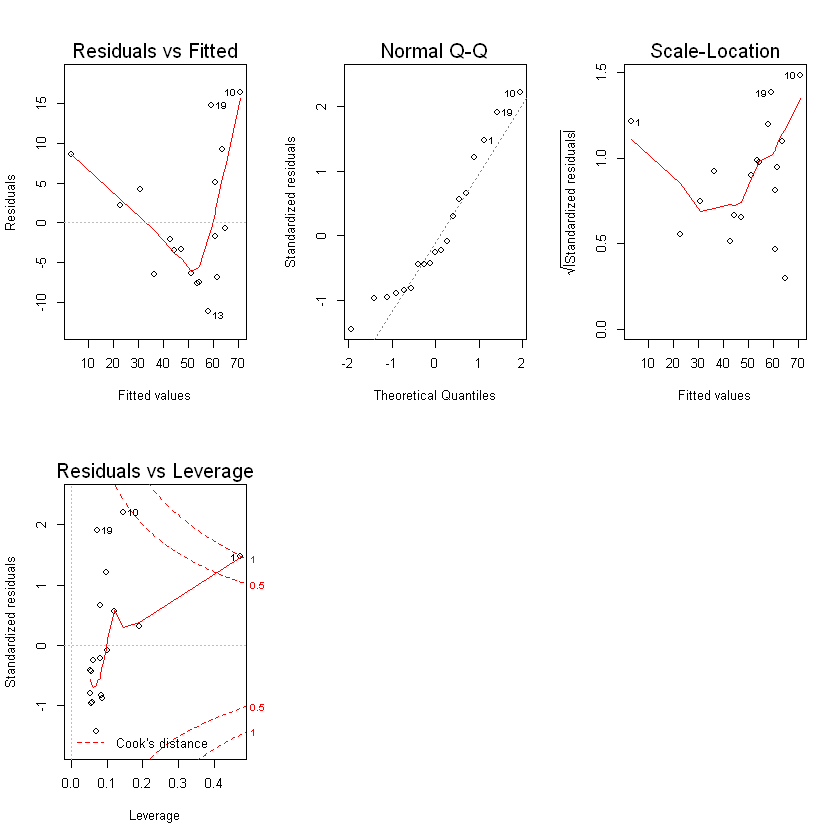

In [25]:
#Analise dos resíduos do modelo estimado
par(mfrow=c(2,3))
plot(ajuste5)

O gráficos dos resíduos são apresentados acima. O teste de **Breusch-Pagan** irá vericar o comportamento  da variância dos resíduos do modelo estimado.

In [26]:
#Teste de Homogeneidade da variância dos residuos
bptest(ajuste5)



	studentized Breusch-Pagan test

data:  ajuste5
BP = 2.22, df = 1, p-value = 0.1362


Levando-se em consideração a seguinte hipótese:

$$H_0: Homocedasticidade$$
$$H_1: Heterocedasticidade$$

De acordo com o teste de Breusch-Pagan os resíduos apresentam variância constante (homocedasticidade). O teste de normalidade dos resíduos é apresentado abaixo.

In [27]:
shapiro.test(residuals(ajuste5))


	Shapiro-Wilk normality test

data:  residuals(ajuste5)
W = 0.92277, p-value = 0.1274


In [28]:
gqtest(ajuste5)


	Goldfeld-Quandt test

data:  ajuste5
GQ = 9.6386, df1 = 8, df2 = 7, p-value = 0.003651
alternative hypothesis: variance increases from segment 1 to 2


O teste apresentou homocedasticidade e normalidade nos resíduos. 